<a href="https://colab.research.google.com/github/NirjharDebnath/Machine-Learning/blob/main/MNIST_NUMBERS_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

In [17]:
train_data = dataset.MNIST(root='sample_data', train=True, download=True, transform=transforms.ToTensor())
test_data = dataset.MNIST(root='sample_data', train=False, download=True, transform=transforms.ToTensor())

In [18]:
train_data.class_to_idx, test_data.class_to_idx
train_data.data.shape, test_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [19]:
import torch.utils.data as data
train_loader = data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=32, shuffle=False)

In [20]:
train_loader.dataset.data.shape, test_loader.dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [21]:
len(train_loader), len(test_loader)

(1875, 313)

## DATA VISUALIZATION

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
train_batch = next(iter(train_loader))
print(train_batch[0].shape)
print(train_batch[1].shape)
test_batch = next(iter(test_loader))
print(test_batch[0].shape)
print(test_batch[1].shape)

# the train_batch has 32 images

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])


torch.Size([1, 28, 28])
torch.Size([])


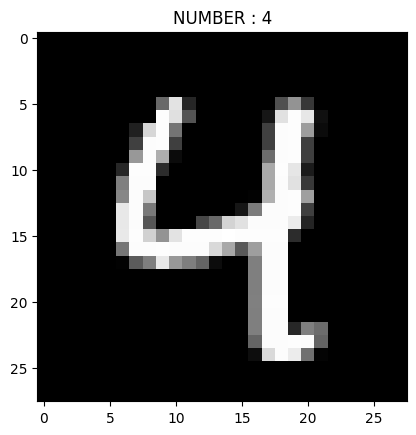

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


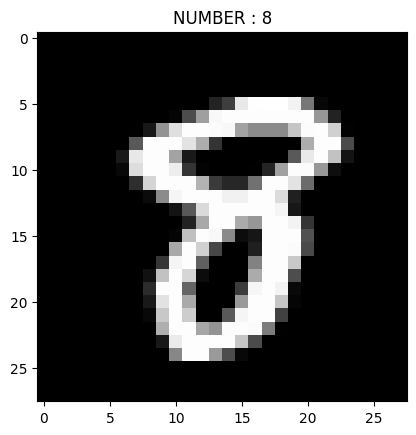

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


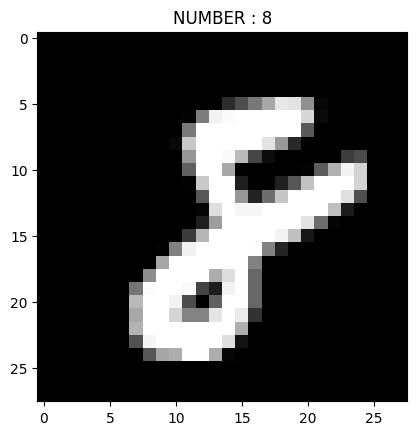

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


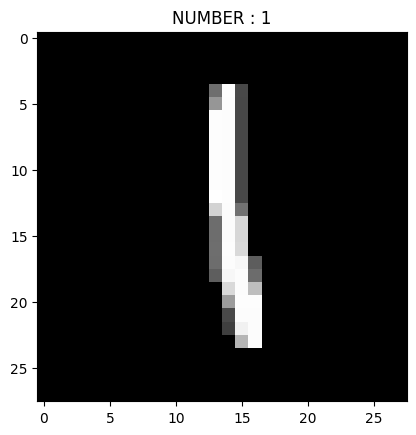

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


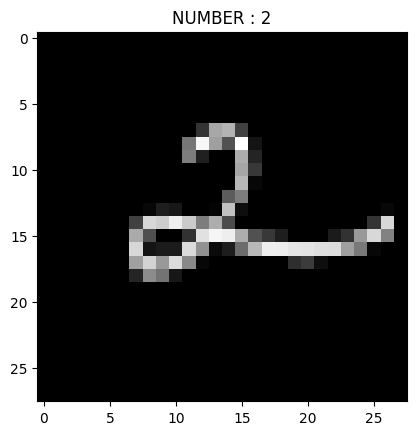

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


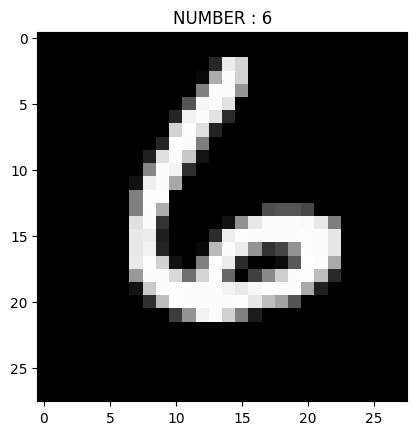

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


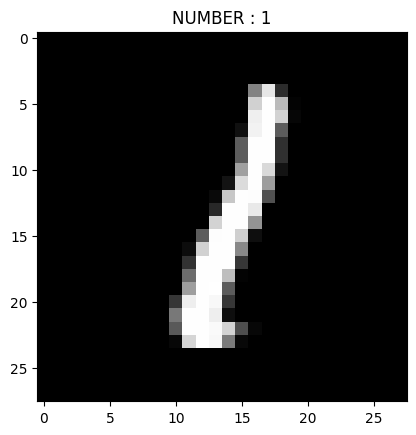

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


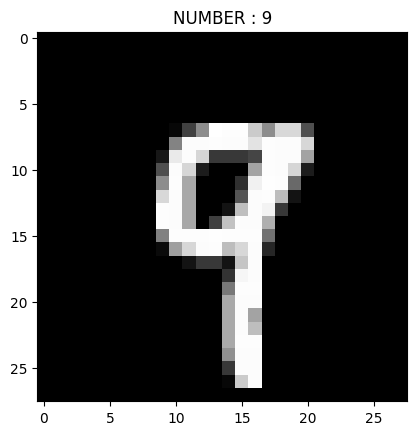

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


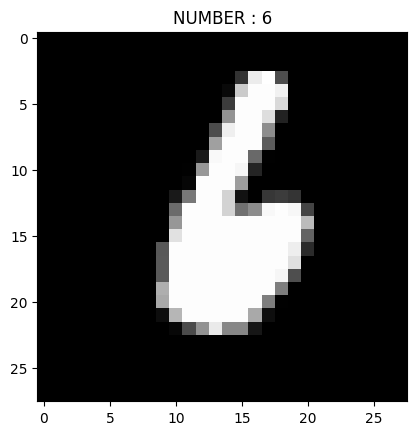

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


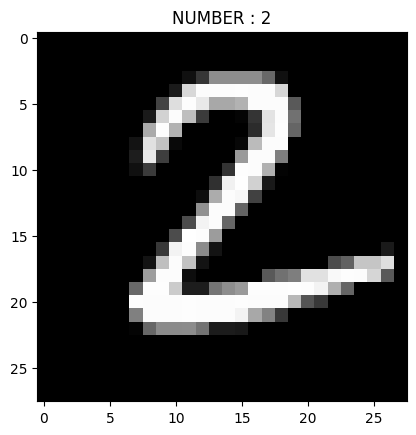

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


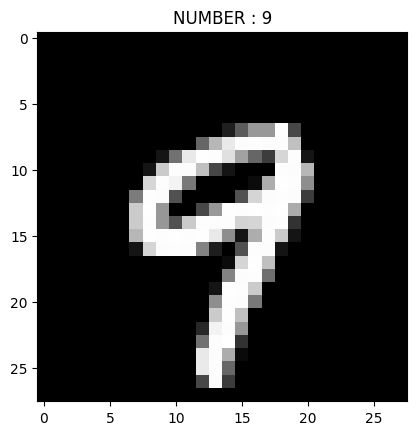

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


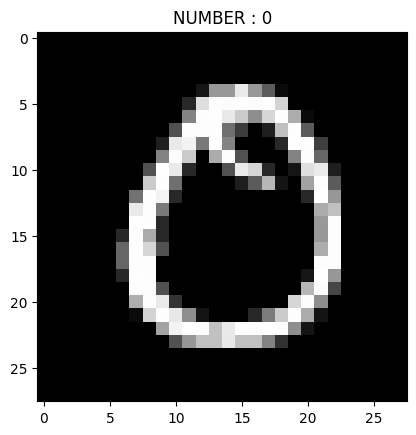

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


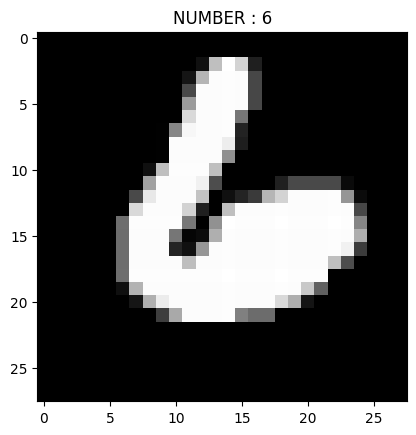

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


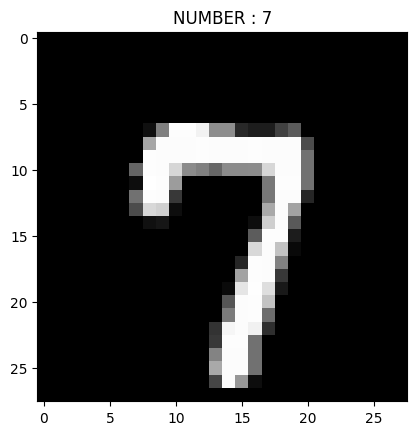

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


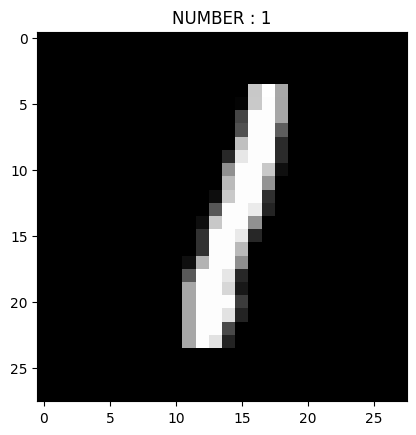

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


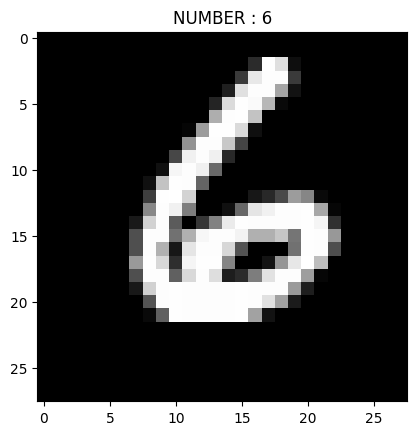

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


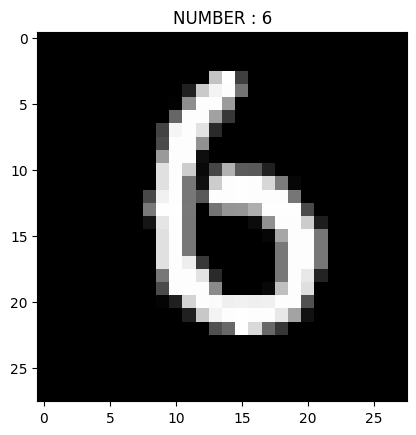

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


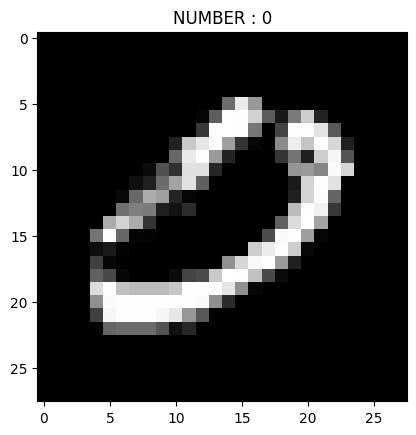

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


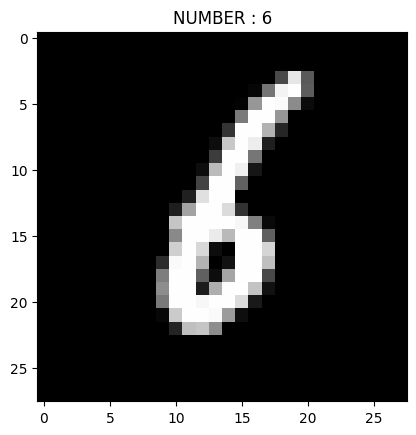

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


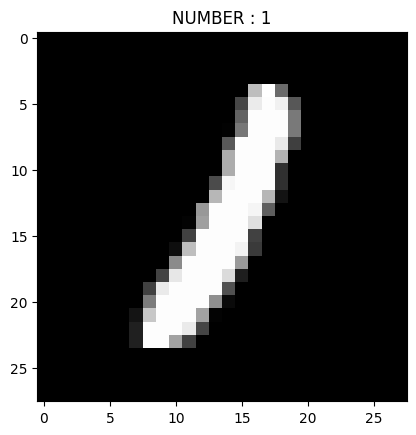

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


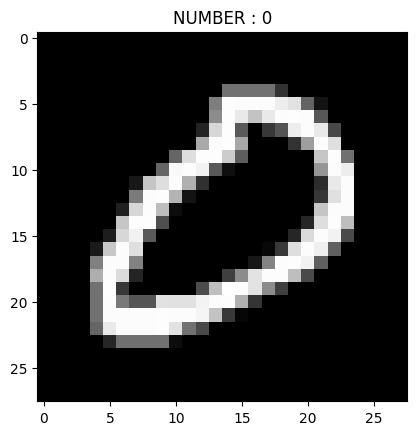

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


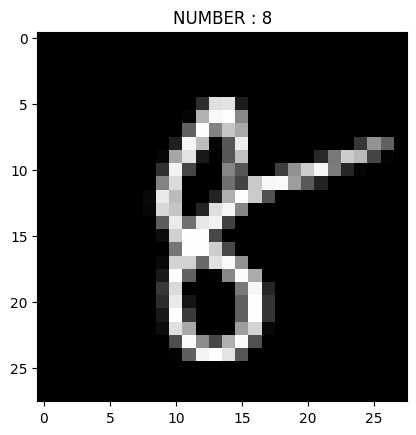

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


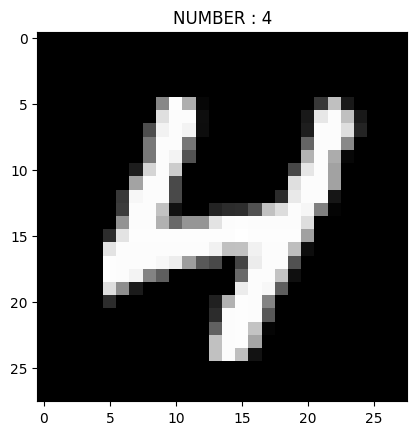

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


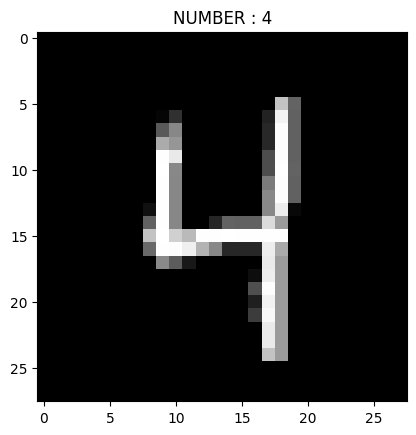

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


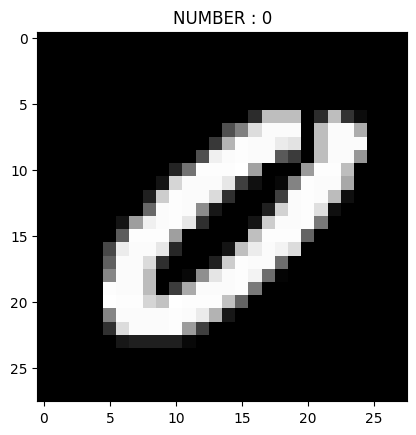

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


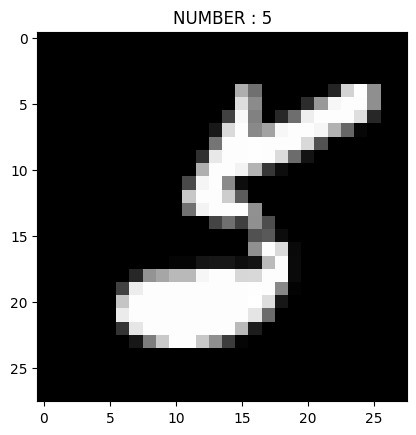

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


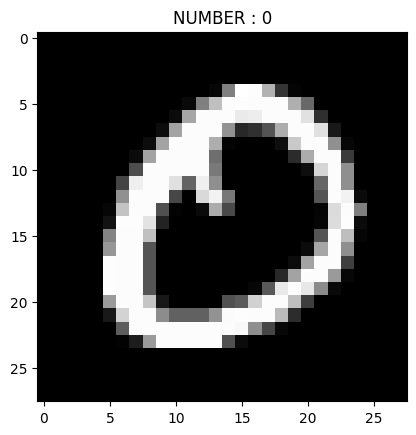

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


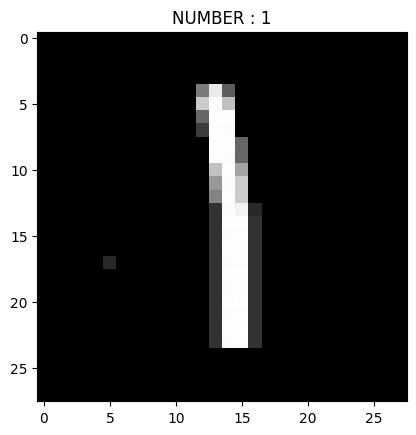

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


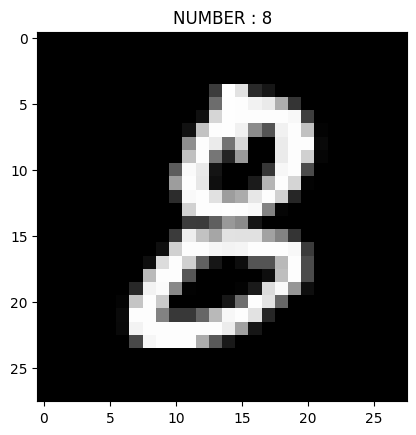

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


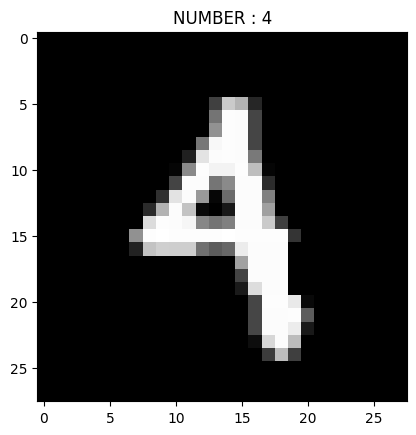

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


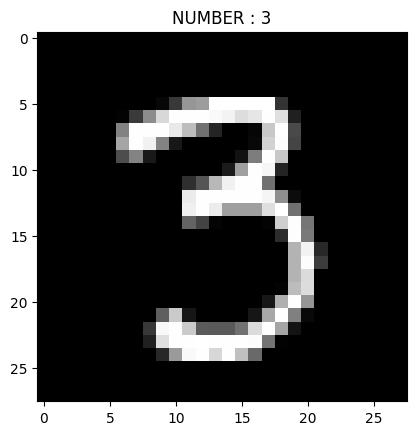

<Figure size 500x500 with 0 Axes>

torch.Size([1, 28, 28])
torch.Size([])


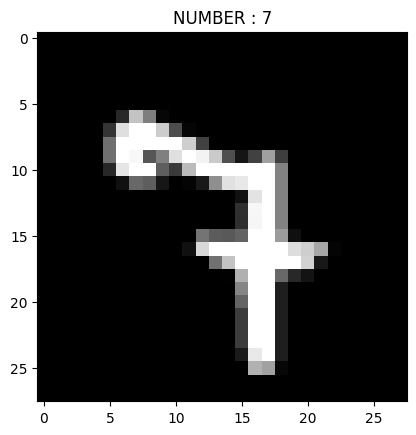

<Figure size 500x500 with 0 Axes>

In [24]:
# i = np.random.randint(0, 32)
for i in range(32):

    image = train_batch[0][i]
    label = train_batch[1][i]
    print(image.shape)
    print(label.shape)
    fig = plt.imshow(image.squeeze(), cmap="grey")
    plt.title(f"NUMBER : {label}")
    fig = plt.figure(figsize=[5, 5])
    plt.show()

## Model

In [25]:
class NUMBERSMODEL(nn.Module):
    def __init__(self, in_channels, hidden_units, output):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels,
                    out_channels=hidden_units,
                    kernel_size=3,
                    padding=1,
                    stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    padding=1,
                    stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block2 = nn.Sequential(
                    nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    padding=1,
                    stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x


model = NUMBERSMODEL(in_channels=1, hidden_units=10, output=10).to(device)


In [26]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [12]:
image = torch.randn(1, 28, 28)
image = image.to(device)
out = torch.argmax(model(image.unsqueeze(0)).squeeze(dim=0))
print(out)

tensor(6, device='cuda:0')


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [14]:
torch.manual_seed(42)
from tqdm.auto import tqdm
# Measure time
from timeit import default_timer as timer
timeron = timer()

# Train and test model
EPOCHS = 4
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_loader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

timeroff = timer()
print(f"Total time taken on {device} : {timeroff-timeron}")


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.22004 | Train accuracy: 93.18%
Test loss: 0.07798 | Test accuracy: 97.61%

Epoch: 1
---------
Train loss: 0.08076 | Train accuracy: 97.38%
Test loss: 0.05724 | Test accuracy: 98.29%

Epoch: 2
---------
Train loss: 0.06245 | Train accuracy: 98.01%
Test loss: 0.05150 | Test accuracy: 98.28%

Epoch: 3
---------
Train loss: 0.05362 | Train accuracy: 98.30%
Test loss: 0.05534 | Test accuracy: 98.20%

Total time taken on cuda : 63.050271898000005


In [ ]:
import tkinter as tk
from tkinter import colorchooser, filedialog, simpledialog
from PIL import Image, ImageDraw

class HandwritingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Handwriting Notes")

        # Default canvas settings
        self.canvas_width = 800
        self.canvas_height = 600
        self.canvas_bg = "black"
        self.pen_color = "white"
        self.pen_size = 3
        self.allow_mouse_resize = True  # State variable to control mouse resizing

        # Allow the root window to be resizable
        self.root.geometry(f"{self.canvas_width}x{self.canvas_height + 100}")  # Initial size
        self.root.resizable(True, True)  # Allow resizing

        # Create canvas
        self.canvas = tk.Canvas(root, bg=self.canvas_bg, cursor="pencil")
        self.canvas.pack(fill="both", expand=True)

        # Initialize Pillow image for saving
        self.image = Image.new("RGB", (self.canvas_width, self.canvas_height), self.canvas_bg)
        self.draw = ImageDraw.Draw(self.image)

        # Bind mouse and keyboard events
        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.bind("<ButtonRelease-1>", self.reset)
        self.root.bind("<Configure>", self.update_canvas_size)
        self.root.bind("<Control-s>", self.save_image_shortcut)  # Key binding for Ctrl+S

        # Controls
        control_frame = tk.Frame(root)
        control_frame.pack(pady=10)

        # Pen color button
        color_button = tk.Button(control_frame, text="Change Color", command=self.change_color)
        color_button.grid(row=0, column=0, padx=5)

        # Pen size slider
        self.size_slider = tk.Scale(control_frame, from_=1, to=10, orient="horizontal", label="Pen Size")
        self.size_slider.set(self.pen_size)
        self.size_slider.grid(row=0, column=1, padx=5)

        # Resize button
        resize_button = tk.Button(control_frame, text="Manual Resize Canvas", command=self.resize_canvas)
        resize_button.grid(row=0, column=2, padx=5)

        # Save button
        save_button = tk.Button(control_frame, text="Save", command=self.save_image)
        save_button.grid(row=0, column=3, padx=5)

        # Clear button
        clear_button = tk.Button(control_frame, text="Clear Canvas", command=self.clear_canvas)
        clear_button.grid(row=0, column=4, padx=5)

        # Allow mouse resizing button
        enable_resize_button = tk.Button(control_frame, text="Enable Mouse Resize", command=self.enable_mouse_resize)
        enable_resize_button.grid(row=0, column=5, padx=5)

        # Tracking variables
        self.last_x, self.last_y = None, None

    def paint(self, event):
        x, y = event.x, event.y
        pen_size = self.size_slider.get()  # Get current pen size
        if self.last_x and self.last_y:
            # Draw on the canvas
            self.canvas.create_line(self.last_x, self.last_y, x, y, fill=self.pen_color, width=pen_size)
            # Draw on the Pillow image
            self.draw.line([self.last_x, self.last_y, x, y], fill=self.pen_color, width=pen_size)
        self.last_x, self.last_y = x, y

    def reset(self, event):
        self.last_x, self.last_y = None, None

    def change_color(self):
        # Open a color chooser dialog
        color = colorchooser.askcolor(color=self.pen_color)[1]
        if color:
            self.pen_color = color

    def update_canvas_size(self, event):
        if self.allow_mouse_resize:
            # Check if the canvas size has changed
            new_width = event.width
            new_height = event.height - 100  # Subtract control frame height

            if new_width != self.canvas_width or new_height != self.canvas_height:
                self.canvas_width, self.canvas_height = new_width, new_height
                # Resize the canvas
                self.canvas.config(width=self.canvas_width, height=self.canvas_height)
                # Create a new Pillow image with updated dimensions
                new_image = Image.new("RGB", (self.canvas_width, self.canvas_height), self.canvas_bg)
                new_image.paste(self.image, (0, 0))  # Copy existing content into the new image
                self.image = new_image
                self.draw = ImageDraw.Draw(self.image)
                print(f"Canvas resized to {self.canvas_width}x{self.canvas_height}")

    def resize_canvas(self):
        # Disable mouse resizing temporarily
        self.allow_mouse_resize = False

        # Ask the user for new canvas dimensions
        new_width = simpledialog.askinteger("Resize Canvas", "Enter new width:", initialvalue=self.canvas_width, minvalue=100, maxvalue=5000)
        new_height = simpledialog.askinteger("Resize Canvas", "Enter new height:", initialvalue=self.canvas_height, minvalue=100, maxvalue=5000)

        if new_width and new_height:
            self.canvas_width, self.canvas_height = new_width, new_height
            # Resize the window to fit the new canvas dimensions
            self.root.geometry(f"{self.canvas_width}x{self.canvas_height + 100}")
            # Resize the canvas
            self.canvas.config(width=self.canvas_width, height=self.canvas_height)
            # Create a new Pillow image with updated dimensions
            new_image = Image.new("RGB", (self.canvas_width, self.canvas_height), self.canvas_bg)
            new_image.paste(self.image, (0, 0))  # Copy existing content into the new image
            self.image = new_image
            self.draw = ImageDraw.Draw(self.image)
            print(f"Canvas manually resized to {self.canvas_width}x{self.canvas_height}")

    def enable_mouse_resize(self):
        # Enable mouse resizing
        self.allow_mouse_resize = True
        print("Mouse resizing enabled.")

    def save_image(self):
        # Open a save dialog for the user to choose file name and location
        # file_path = filedialog.asksaveasfilename(
        #     defaultextension=".png",
        #     filetypes=[("PNG files", "*.png"), ("All files", "*.*")],
        #     title="Save Image"
        # )
        file_path = 'handwritten_digit.png'
        if file_path:
            self.image.save(file_path)
            print(f"Image saved as {file_path}")

    def save_image_shortcut(self, event):
        # Handle Ctrl+S key binding to save image
        self.save_image()

    def clear_canvas(self):
        # Clear the Tkinter canvas
        self.canvas.delete("all")
        # Reset the Pillow image
        self.image = Image.new("RGB", (self.canvas_width, self.canvas_height), self.canvas_bg)
        self.draw = ImageDraw.Draw(self.image)

# Create the Tkinter window
if __name__ == "__main__":
    root = tk.Tk()
    app = HandwritingApp(root)
    root.mainloop()

In [ ]:
# OPEN CV PROCESS IS NOT WORKING

# import cv2
# import numpy as np
# from PIL import Image
# import torch

# def preprocess_handwritten_digit(image_path):
#     """
#     Preprocesses a handwritten digit image:
#     1. Loads the image.
#     2. Converts to grayscale.
#     3. Resizes to 28x28 pixels.
#     4. Inverts colors (if needed, based on background color).
#     5. Converts to a tensor.
#     """
#     try:
#         img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         if img is None:
#             raise FileNotFoundError(f"Image not found at {image_path}")

#         # Resize
#         img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

#         # Invert colors if needed (adjust threshold if necessary)
#         _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

#         # Normalize pixel values to 0-1 and convert to tensor
#         img = img / 255.0
#         img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

#         return img_tensor
#     except Exception as e:
#         print(f"Error preprocessing image: {e}")
#         return None

# # Example usage (assuming you've uploaded an image file named 'handwritten_digit.png'):
# image_tensor = preprocess_handwritten_digit('handwritten_digit.png')



# TORCH TRANSFORMS PROCESS


import torch
import torchvision.transforms as transforms
from PIL import Image

def image_to_tensor(image_path):
    """
    Converts a saved image to a PyTorch tensor.

    Args:
        image_path (str): Path to the image file.

    Returns:
        torch.Tensor: The image as a PyTorch tensor.
                      Returns None if there's an error loading or processing the image.
    """
    try:
        # 1. Open the image using PIL
        image = Image.open(image_path)

        # 2. Define transformations (optional, but highly recommended)
        #    - Convert to RGB (if the image is grayscale or has an alpha channel)
        #    - Resize to a consistent size (if needed for your model)
        #    - Convert to tensor
        #    - Normalize pixel values (usually between 0 and 1 or -1 and 1, depending on the model)
        transform = transforms.Compose([
            transforms.Grayscale(),
            transforms.ToTensor(),  # Convert to tensor
            transforms.Resize((28, 28)), # Resize to a common size (adjust as needed) If removed, keep transforms.CenterCrop below
            transforms.CenterCrop(28), # Center crop to the specified size
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats (adjust if using a different dataset)
        ])



        # 3. Apply the transformations
        tensor = transform(image)


        return tensor

    except (FileNotFoundError, OSError, ValueError) as e:  # Catch potential errors like file not found, or image format issues
        print(f"Error loading or processing image: {e}")
        return None



# Example usage:
image_path = "handwritten_digit.png" # Replace with the actual path to your image
image_tensor = image_to_tensor(image_path)

if image_tensor is not None:
    print(f"Image tensor shape: {image_tensor.shape}")
    print(f"Image tensor data type: {image_tensor.dtype}")
    model.eval()
    with torch.inference_mode():
        image_tensor = image_tensor.to(device)
        prediction = model(image_tensor.unsqueeze(0))
        predicted_class = torch.argmax(prediction).item()
        plt.imshow(image_tensor.to("cpu").squeeze(0), cmap='grey')
        print(prediction)
    print(f"Predicted digit: {predicted_class}")

## SET THE CANVAS SIZE TO 200,200 PIXELS AND USE A THICK PENSIZE LIKE 5 OR 6
## MAKE THE DATA YOU ENTER LOOK NEARLY SAME AS THAT OF MNIST DATASET
## RUN IT IN LOCAL ENVIRONMENT AS GOOGLE COLAB DOES NOT SUPPORT GUI